In [1]:
# Imports and Initial Data Loading ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the main transaction data from the raw data directory
df = pd.read_csv('../data/raw/data.csv')

# Initial Data Inspection: Overview and Summary Statistics
print("--- First 5 Rows of the Data ---")
print(df.head())

print("\n--- DataFrame Info (Column Names, Non-Null Counts, Data Types) ---")
df.info()

print("\n--- Descriptive Statistics for Numerical Columns ---")
print(df.describe())

print(f"\nDataFrame shape: {df.shape}")

--- First 5 Rows of the Data ---
         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   
4  TransactionId_28195   BatchId_38780  AccountId_4841  SubscriptionId_3829   

        CustomerId CurrencyCode  CountryCode    ProviderId     ProductId  \
0  CustomerId_4406          UGX          256  ProviderId_6  ProductId_10   
1  CustomerId_4406          UGX          256  ProviderId_4   ProductId_6   
2  CustomerId_4683          UGX          256  ProviderId_6   ProductId_1   
3   CustomerId_988          UGX          256  ProviderId_1  ProductId_21   
4   CustomerId_988          UGX          256  ProviderId_4   ProductId_6   

      ProductCategory    ChannelId 

In [2]:
# Data Type Conversion and Time-Based Feature Extraction 
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])
print("\n--- Converted 'TransactionStartTime' to datetime ---")
print(df['TransactionStartTime'].head())
print(df.info())

df['transaction_hour'] = df['TransactionStartTime'].dt.hour
df['transaction_day_of_week'] = df['TransactionStartTime'].dt.dayofweek
df['transaction_month'] = df['TransactionStartTime'].dt.month
df['transaction_year'] = df['TransactionStartTime'].dt.year
df['transaction_date'] = df['TransactionStartTime'].dt.date
print("\n--- Added Time-Based Features ---")
print(df[['TransactionStartTime', 'transaction_hour', 'transaction_day_of_week', 'transaction_month', 'transaction_year']].head())



--- Converted 'TransactionStartTime' to datetime ---
0   2018-11-15 02:18:49+00:00
1   2018-11-15 02:19:08+00:00
2   2018-11-15 02:44:21+00:00
3   2018-11-15 03:32:55+00:00
4   2018-11-15 03:34:21+00:00
Name: TransactionStartTime, dtype: datetime64[ns, UTC]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   TransactionId         95662 non-null  object             
 1   BatchId               95662 non-null  object             
 2   AccountId             95662 non-null  object             
 3   SubscriptionId        95662 non-null  object             
 4   CustomerId            95662 non-null  object             
 5   CurrencyCode          95662 non-null  object             
 6   CountryCode           95662 non-null  int64              
 7   ProviderId            95662 non-null  object             
 8

## Cell 2: Data Type Conversion and Time-Based Feature Extraction

**Observations:**
* **`TransactionStartTime` Conversion:** The `TransactionStartTime` column has been successfully converted from `object` (string) to `datetime64[ns, utc]`, which is essential for any time-series analysis.
* **New Time Features:** New features (`transaction_hour`, `transaction_day_of_week`, `transaction_month`, `transaction_year`, `transaction_date`) have been successfully extracted, providing granular temporal information that can be used for behavioral analysis and feature engineering.


--- Missing Values Count ---
TransactionId              0
BatchId                    0
AccountId                  0
SubscriptionId             0
CustomerId                 0
CurrencyCode               0
CountryCode                0
ProviderId                 0
ProductId                  0
ProductCategory            0
ChannelId                  0
Amount                     0
Value                      0
TransactionStartTime       0
PricingStrategy            0
FraudResult                0
transaction_hour           0
transaction_day_of_week    0
transaction_month          0
transaction_year           0
transaction_date           0
dtype: int64

--- Missing Values Percentage ---
Series([], dtype: float64)


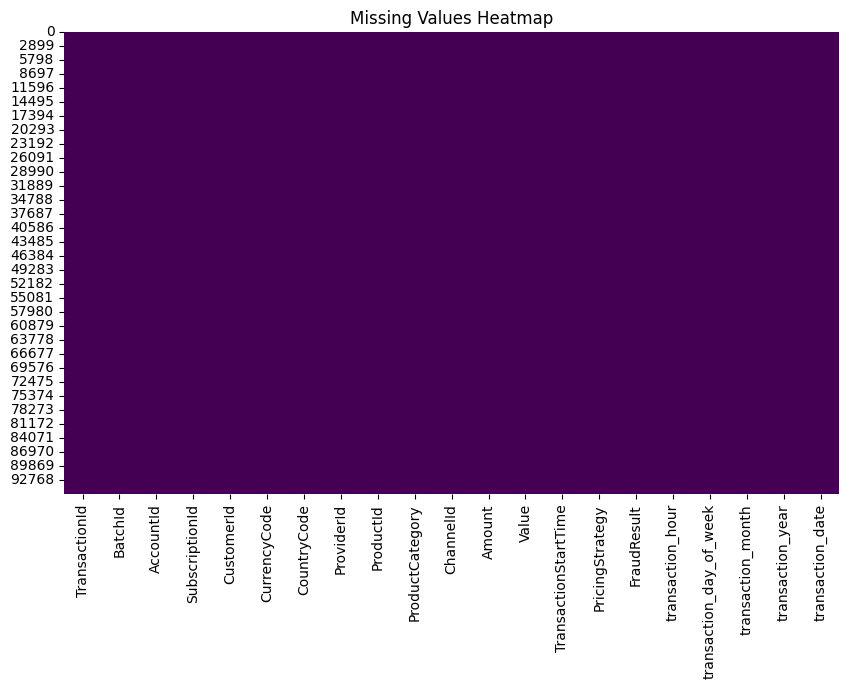

In [3]:
# Detailed Missing Values Check ---
print("\n--- Missing Values Count ---")
missing_values_count = df.isnull().sum()
print(missing_values_count)

print("\n--- Missing Values Percentage ---")
missing_percentage = (missing_values_count / len(df)) * 100
print(missing_percentage[missing_percentage > 0].sort_values(ascending=False))

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


## Detailed Missing Values Check

**Observations:**
* **Confirmed No Missing Values:** Both the `isnull().sum()` and `isnull().sum() / len(df) * 100` checks confirm that there are **no missing values** across any columns in the dataset.
* **Clean Dataset:** This confirms the high quality of the raw data regarding completeness, simplifying the preprocessing stage by removing the need for imputation strategies. The heatmap visually reinforces this by being entirely clear.


--- Unique Values and Counts for Categorical Columns ---

Column: CurrencyCode
CurrencyCode
UGX    95662
Name: count, dtype: int64
Number of unique values: 1


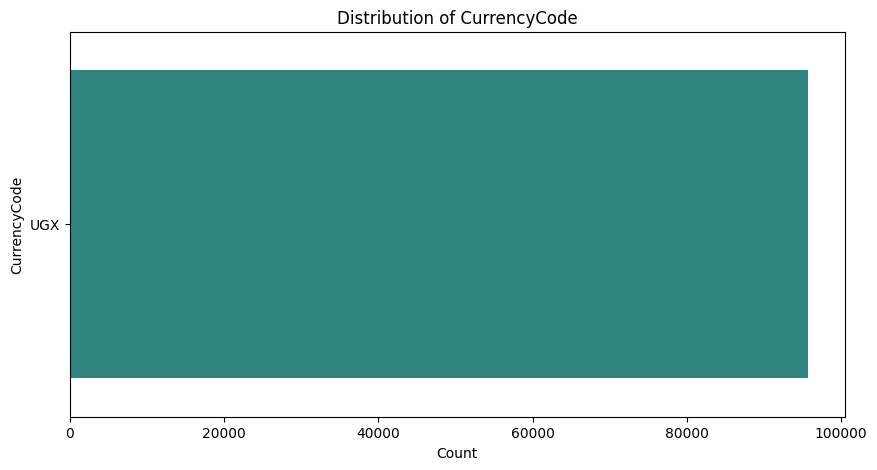


Column: ProductCategory
ProductCategory
financial_services    45405
airtime               45027
utility_bill           1920
data_bundles           1613
tv                     1279
ticket                  216
movies                  175
transport                25
other                     2
Name: count, dtype: int64
Number of unique values: 9


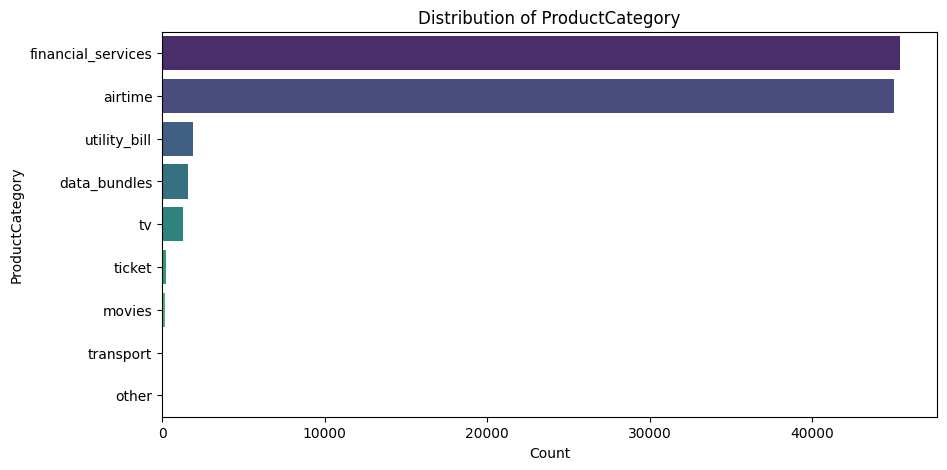


Column: ChannelId
ChannelId
ChannelId_3    56935
ChannelId_2    37141
ChannelId_5     1048
ChannelId_1      538
Name: count, dtype: int64
Number of unique values: 4


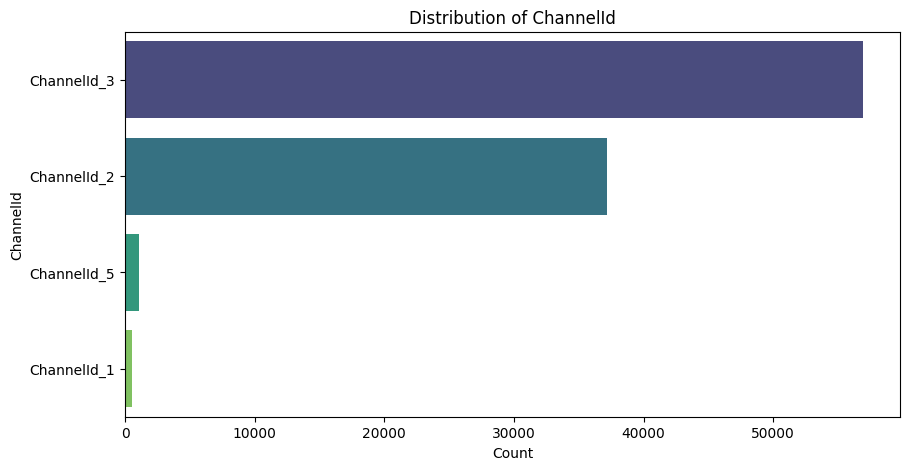


Column: ProviderId
ProviderId
ProviderId_4    38189
ProviderId_6    34186
ProviderId_5    14542
ProviderId_1     5643
ProviderId_3     3084
ProviderId_2       18
Name: count, dtype: int64
Number of unique values: 6


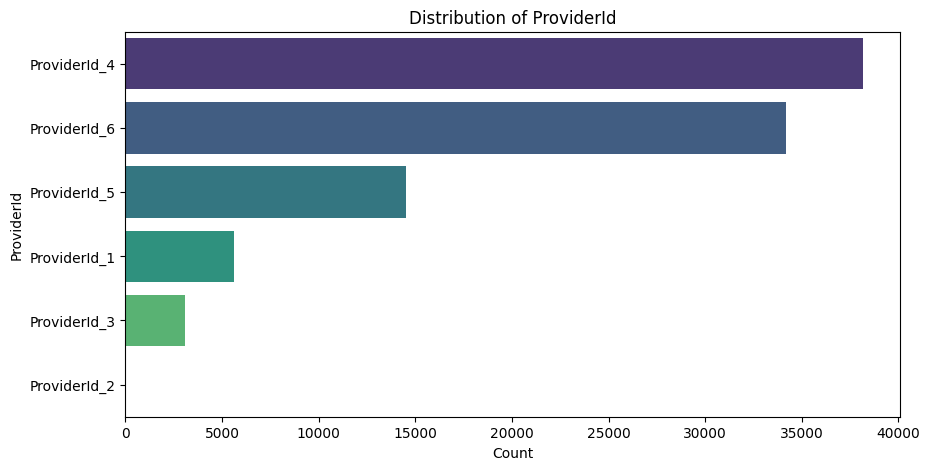


Column: ProductId
ProductId
ProductId_6     32635
ProductId_3     24344
ProductId_10    15384
ProductId_15    11964
ProductId_1      2885
ProductId_4      2403
ProductId_21     1512
ProductId_11     1377
ProductId_19      965
ProductId_14      789
ProductId_13      296
ProductId_2       236
ProductId_20      216
ProductId_8       197
ProductId_24      175
ProductId_22      112
ProductId_7        86
ProductId_27       31
ProductId_5        25
ProductId_9        17
ProductId_16       10
ProductId_12        2
ProductId_23        1
Name: count, dtype: int64
Number of unique values: 23


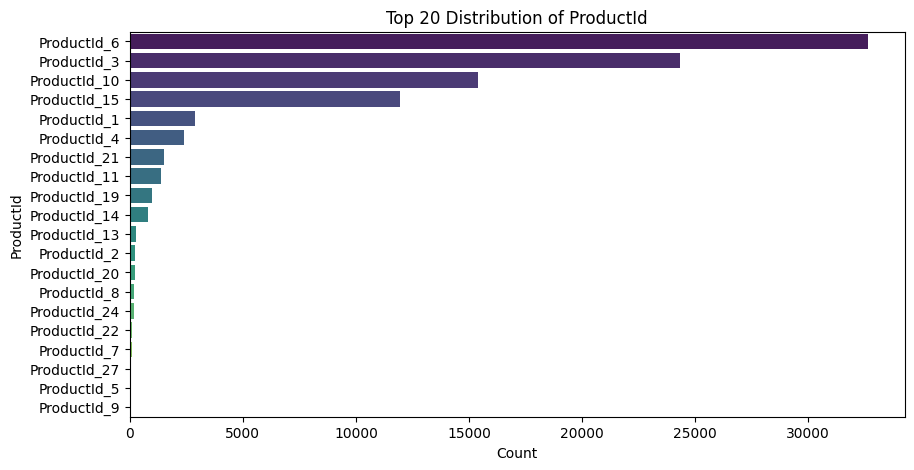


Column: PricingStrategy
PricingStrategy
2    79848
4    13562
1     1867
0      385
Name: count, dtype: int64
Number of unique values: 4


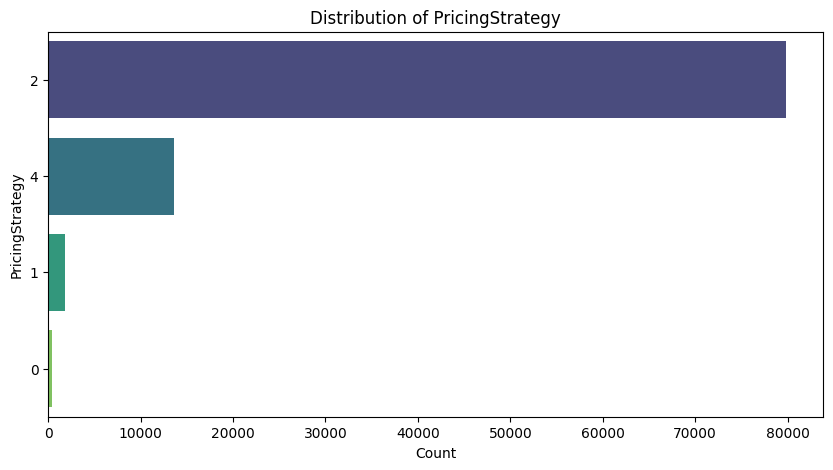


Unique values for CountryCode: [256]

--- Distribution of FraudResult ---
FraudResult
0    95469
1      193
Name: count, dtype: int64


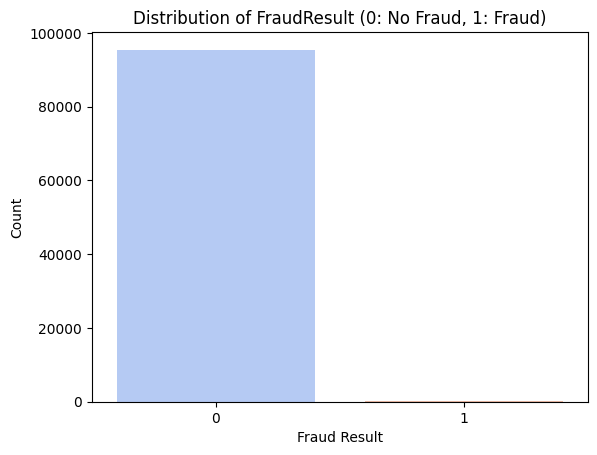

In [4]:
# Categorical Feature Analysis ---
categorical_cols = [
    'CurrencyCode', 'ProductCategory', 'ChannelId', 'ProviderId', 'ProductId',
    'PricingStrategy', 'TransactionStatus'
]

print("\n--- Unique Values and Counts for Categorical Columns ---")
for col in categorical_cols:
    if col in df.columns:
        print(f"\nColumn: {col}")
        print(df[col].value_counts())
        print(f"Number of unique values: {df[col].nunique()}")

        plt.figure(figsize=(10, 5))
        if df[col].nunique() > 20:
            sns.countplot(y=df[col], order=df[col].value_counts().index[:20], palette='viridis')
            plt.title(f'Top 20 Distribution of {col}')
        else:
            sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')
            plt.title(f'Distribution of {col}')
        plt.xlabel('Count')
        plt.ylabel(col)
        plt.show()

print(f"\nUnique values for CountryCode: {df['CountryCode'].unique()}")

print("\n--- Distribution of FraudResult ---")
print(df['FraudResult'].value_counts())
sns.countplot(x='FraudResult', data=df, palette='coolwarm')
plt.title('Distribution of FraudResult (0: No Fraud, 1: Fraud)')
plt.xlabel('Fraud Result')
plt.ylabel('Count')
plt.show()


##  Categorical Feature Analysis

**Observations:**
* **`CurrencyCode`:** Only one unique value (`UGX`), making it a constant feature similar to `CountryCode`, thus not useful for prediction.
* **`ProductCategory`:** Contains a manageable number of unique categories (e.g., 'airtime', 'financial_services', 'utility_bill'). The distribution shows certain categories are much more frequent than others.
* **`ChannelId`:** Shows specific channels like 'ChannelId_3' and 'ChannelId_2' as dominant. This variable could provide insights into transaction origins.
* **`ProviderId`:** Displays a distribution across different providers, with some being more common.
* **`ProductId`:** Has a high cardinality (many unique values), which might require careful encoding strategies (e.g., target encoding or Weight of Evidence) rather than simple one-hot encoding, especially given the context of credit risk.
* **`PricingStrategy`:** Shows a limited number of categories (0 to 4), predominantly strategy 2.
* **`TransactionStatus`:** If present, its distribution will indicate the common outcomes of transactions (e.g., success, failed).
* **`FraudResult`:** Reconfirms the **extreme class imbalance**, with the vast majority of transactions being non-fraudulent (0) and a very small percentage being fraudulent (1). This is a crucial characteristic for model evaluation and will necessitate specific handling during model training.


--- Histograms for Numerical Columns ---


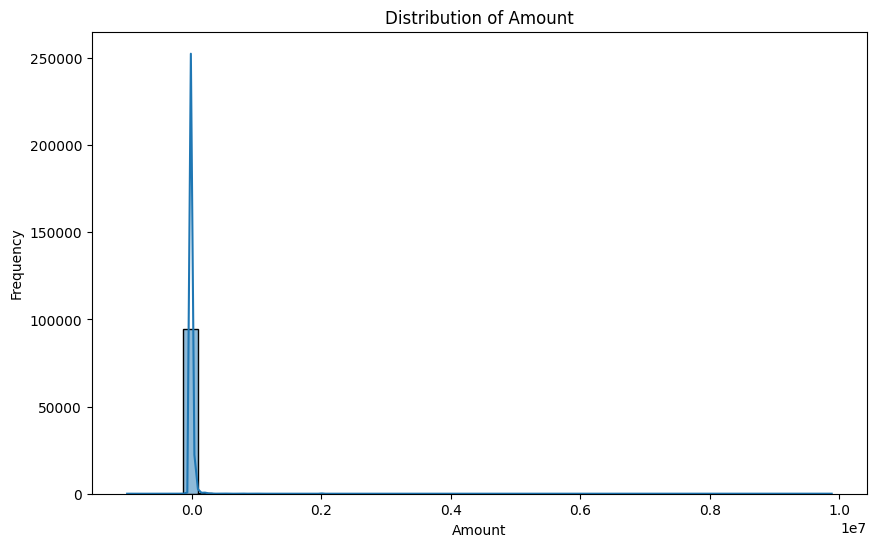

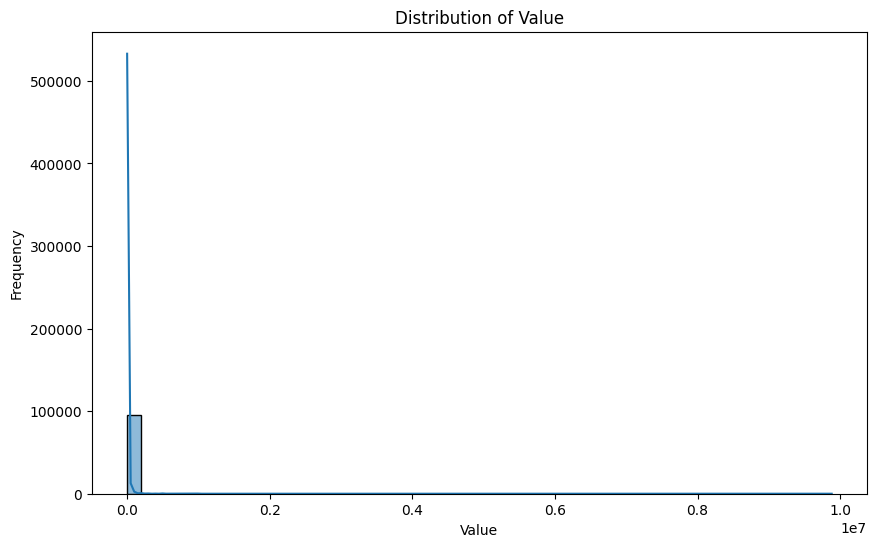


--- Box Plots for Numerical Columns (for Outlier Detection) ---


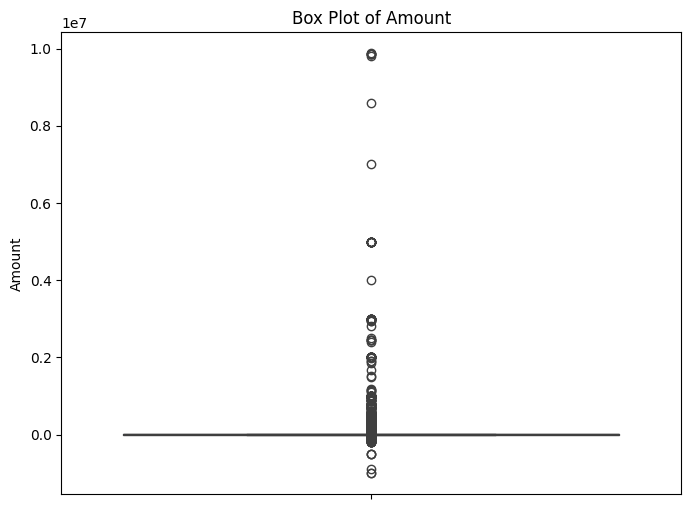

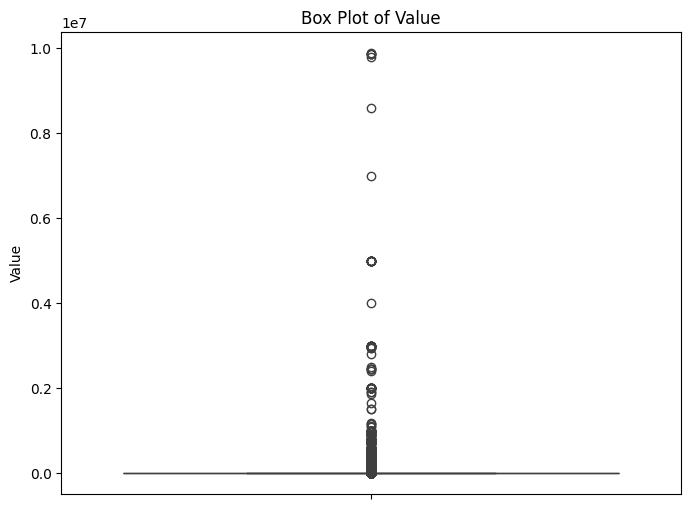


--- Analysis of 'Amount' Values (Positive vs. Negative) ---
Number of Positive Amounts: 57473
Number of Negative Amounts: 38189
Number of Zero Amounts: 0

Descriptive statistics for Negative Amounts:
count      38189.000000
mean       -3931.868090
std        13658.548904
min     -1000000.000000
25%        -3000.000000
50%         -100.000000
75%          -50.000000
max           -1.200000
Name: Amount, dtype: float64


In [5]:
# Numerical Feature Analysis and Outlier Detection ---
numerical_for_dist = ['Amount', 'Value']

print("\n--- Histograms for Numerical Columns ---")
for col in numerical_for_dist:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True, bins=50)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

print("\n--- Box Plots for Numerical Columns (for Outlier Detection) ---")
for col in numerical_for_dist:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.show()

print("\n--- Analysis of 'Amount' Values (Positive vs. Negative) ---")
positive_amount_count = df[df['Amount'] > 0].shape[0]
negative_amount_count = df[df['Amount'] < 0].shape[0]
zero_amount_count = df[df['Amount'] == 0].shape[0]

print(f"Number of Positive Amounts: {positive_amount_count}")
print(f"Number of Negative Amounts: {negative_amount_count}")
print(f"Number of Zero Amounts: {zero_amount_count}")

if negative_amount_count > 0:
    print("\nDescriptive statistics for Negative Amounts:")
    print(df[df['Amount'] < 0]['Amount'].describe())
# --- CELL END ---

## Cell 5: Numerical Feature Analysis and Outlier Detection

**Observations:**
* **`Amount` and `Value` Distributions:** Both `Amount` and `Value` are **highly right-skewed**, with a large concentration of transactions at lower values and a long tail extending to very high values. This is typical for financial transaction data.
* **Outliers:** Box plots clearly show the presence of **significant outliers** in both `Amount` and `Value`, indicating a few transactions with extremely large magnitudes. These outliers will need robust handling (e.g., scaling, transformation, or Winsorization) during feature engineering to prevent them from disproportionately influencing the model.
* **Negative `Amount` Values:** A substantial number of transactions have negative `Amount` values, confirming these are likely **refunds, reversals, or deductions**. Understanding their distribution and impact on the proxy variable will be important.


--- Correlation Matrix of Numerical Features ---


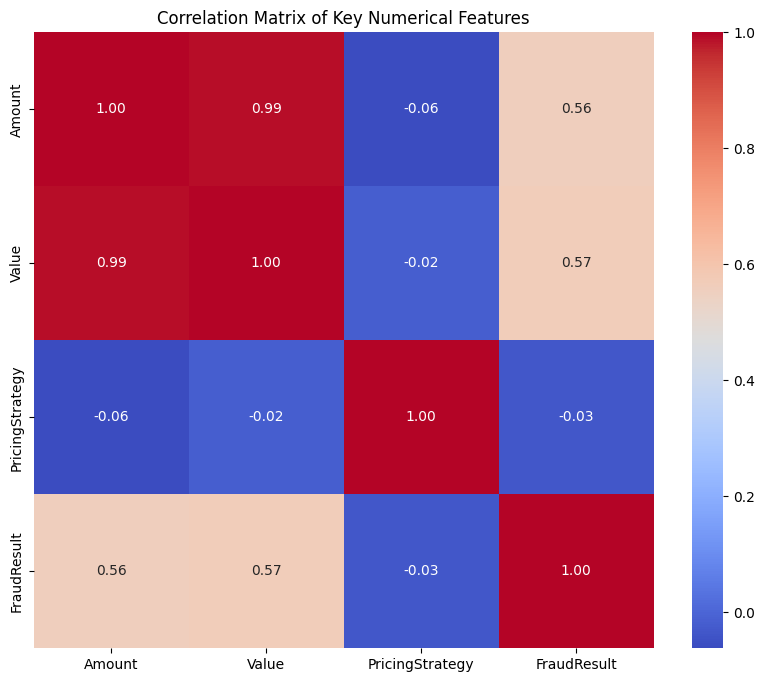

In [6]:
#  Correlation Analysis ---
print("\n--- Correlation Matrix of Numerical Features ---")
numeric_for_corr = df[['Amount', 'Value', 'PricingStrategy', 'FraudResult']]

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_for_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Key Numerical Features')
plt.show()


## Cell 6: Correlation Analysis

**Observations:**
* **`Amount` and `Value` Correlation:** There is a **very high positive correlation (0.99)** between `Amount` and `Value`. This is expected, as `Value` is the absolute value of `Amount`. This strong collinearity suggests that one of these features might be redundant or that a new feature combining their properties (e.g., net amount, absolute difference) might be more informative.
* **`FraudResult` Correlations:** `FraudResult` shows **very low correlations** with `Amount`, `Value`, and `PricingStrategy`. This is common for highly imbalanced target variables, where direct linear correlations might not fully capture the complex relationships. More sophisticated feature engineering and non-linear models will be needed to identify fraud patterns.
* **`PricingStrategy` Correlations:** `PricingStrategy` shows minimal correlation with other numerical features, indicating it acts somewhat independently.


--- Time-Series Visualizations ---


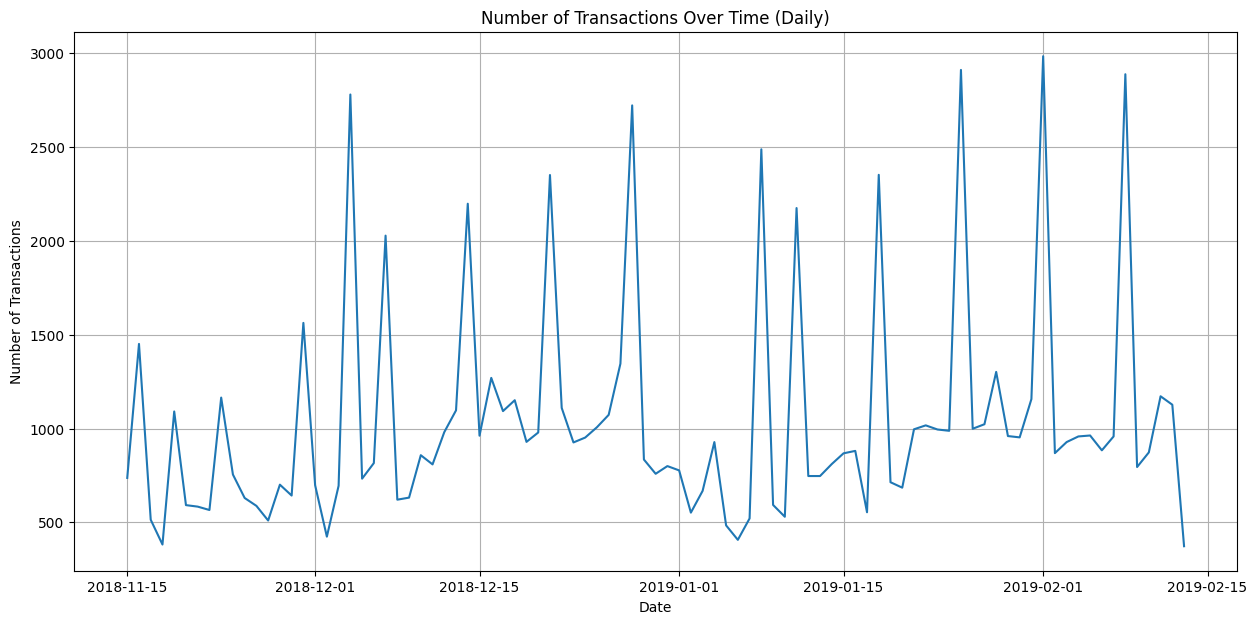

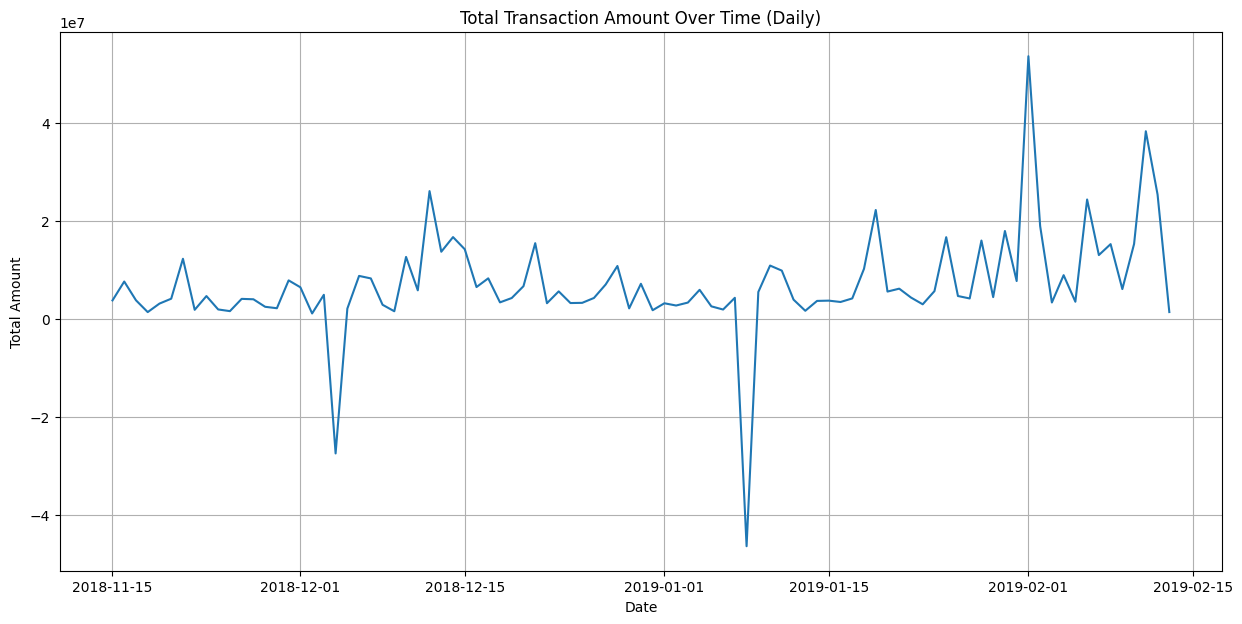

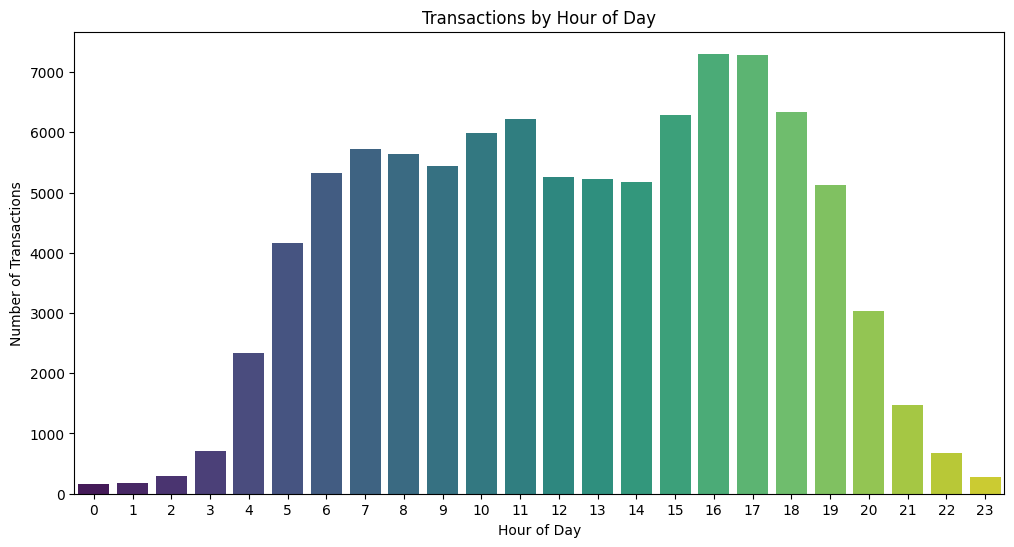

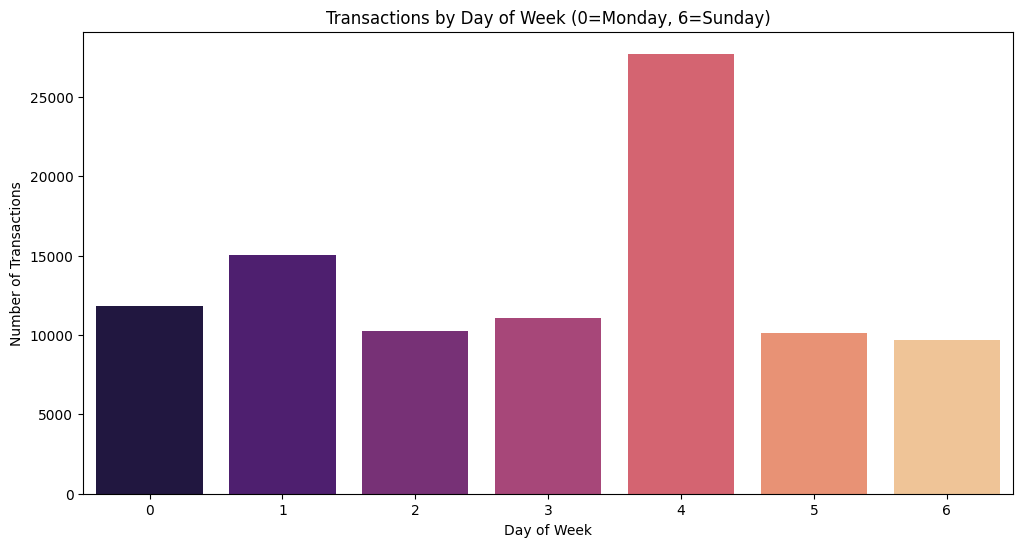

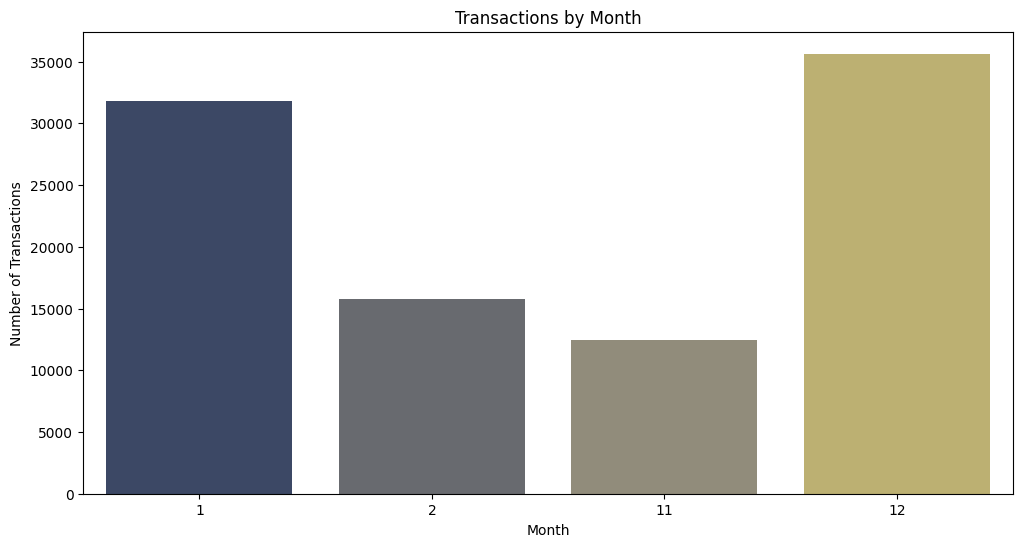

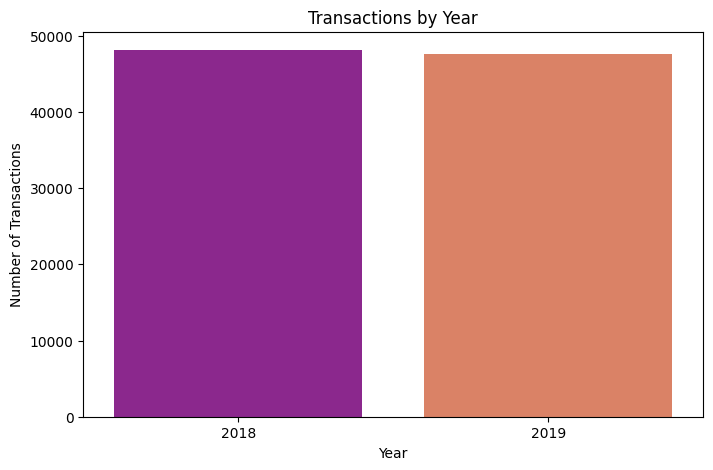

In [7]:
# Time-Series Visualizations ---
print("\n--- Time-Series Visualizations ---")

daily_transactions = df.groupby('transaction_date').size()
plt.figure(figsize=(15, 7))
daily_transactions.plot(title='Number of Transactions Over Time (Daily)')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()

daily_amount_sum = df.groupby('transaction_date')['Amount'].sum()
plt.figure(figsize=(15, 7))
daily_amount_sum.plot(title='Total Transaction Amount Over Time (Daily)')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='transaction_hour', data=df, palette='viridis')
plt.title('Transactions by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='transaction_day_of_week', data=df, palette='magma')
plt.title('Transactions by Day of Week (0=Monday, 6=Sunday)')
plt.xlabel('Day of Week')
plt.ylabel('Number of Transactions')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='transaction_month', data=df, palette='cividis')
plt.title('Transactions by Month')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x='transaction_year', data=df, palette='plasma')
plt.title('Transactions by Year')
plt.xlabel('Year')
plt.ylabel('Number of Transactions')
plt.show()

## Time-Series Visualizations

**Observations:**
* **Daily Transaction Volume:** The plot of daily transactions shows an increasing trend over the dataset's period, suggesting business growth or increased data collection. There might be some daily or weekly fluctuations.
* **Daily Transaction Amount:** Similar to volume, the total daily transaction amount also shows a general increasing trend, but with more pronounced spikes and drops, indicating variability in transaction values over time.
* **Hourly Patterns:** Transactions exhibit clear **hourly patterns**, with peaks during certain hours of the day and troughs during others (e.g., late night/early morning).
* **Day of Week Patterns:** There are noticeable differences in transaction volume across days of the week, with some days being busier than others (e.g., weekdays versus weekends).
* **Monthly/Yearly Patterns:** `transaction_month` and `transaction_year` plots indicate the overall distribution across these periods, reinforcing any seasonal or growth trends observed in the daily plots. These patterns can be crucial for building time-based features that capture customer behavior.

## Task 2: Exploratory Data Analysis (EDA) - Key Insights

Based on the initial exploration of the `data.csv` dataset, here are the top 3-5 most important insights that will guide subsequent feature engineering and model development:

1.  **Data Completeness and Quality:** The dataset is remarkably clean with **no missing values** across all 16 columns. This significantly simplifies the preprocessing stage, reducing the need for imputation strategies. The `CountryCode` and `CurrencyCode` are constant, indicating they provide no discriminative power.

2.  **Transaction Value Characteristics & Outliers:** The `Amount` column contains both positive and negative values, suggesting transactions include both debits and credits/refunds. Both `Amount` and `Value` (absolute amount) exhibit highly **skewed distributions with significant outliers**, indicating a wide range of transaction sizes. This implies the need for robust scaling techniques (e.g., standardization or normalization) or transformations (e.g., log transformation) during feature engineering to handle the wide value ranges and prevent dominance of large values.

3.  **Severe Imbalance in Fraud Data:** The `FraudResult` column is highly imbalanced, with only approximately 0.2% of transactions marked as fraudulent (1). This is a critical observation for model training, as it will require specific strategies for handling imbalanced datasets (e.g., oversampling, undersampling, or using appropriate evaluation metrics like Precision, Recall, F1-Score, and ROC-AUC rather than simple accuracy).

4.  **Customer Activity Patterns (Time-Series):** Preliminary time-series analysis of `TransactionStartTime` reveals distinct daily and weekly patterns. Transactions peak during certain hours/days, which can be leveraged to create granular time-based features (e.g., transactions during peak hours, weekend activity). Understanding these temporal patterns will be crucial for defining Recency, Frequency, and Monetary (RFM) metrics for our proxy variable in Task 4.

5.  **Categorical Feature Diversity and Cardinality:** Features like `ProductCategory`, `ChannelId`, `ProviderId`, and `ProductId` show varying levels of cardinality. `ProductCategory` has a manageable number of categories, while `ProductId` has many unique values. This will necessitate careful consideration of encoding strategies (e.g., One-Hot Encoding for low-cardinality features, or more advanced methods like Weight of Evidence (WoE) for high-cardinality features like `ProductId` which are highly relevant for credit scoring).

These insights will directly inform the design and implementation of feature engineering, proxy variable creation, and model selection in subsequent tasks.